In [6]:
## Step 1: Import Libraries & Load DataSet 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
## Load the dataset

diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target

In [8]:
## Step 2: Inspection of data

print(df.head())
print(df.info())
print(df.describe())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp

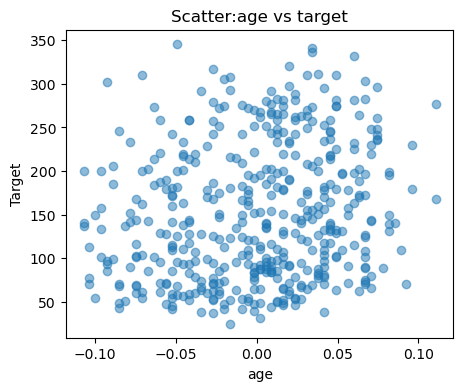

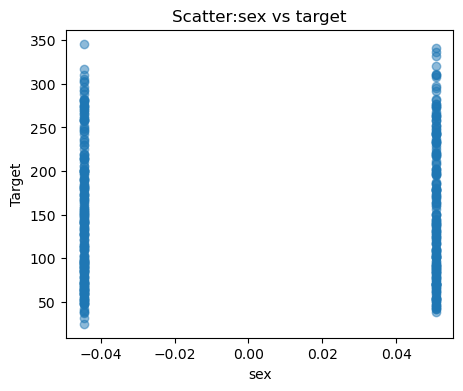

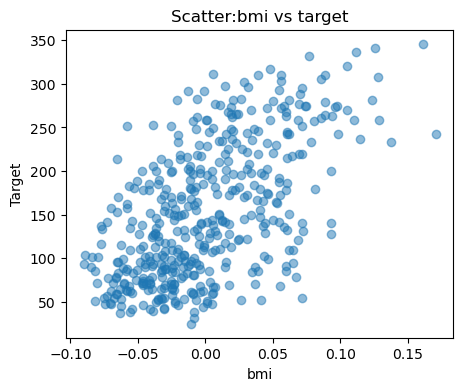

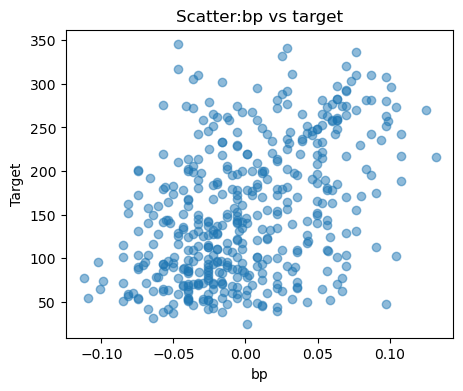

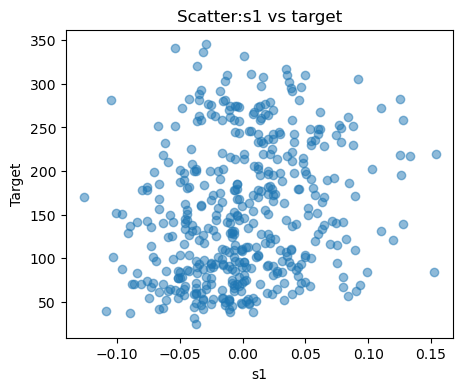

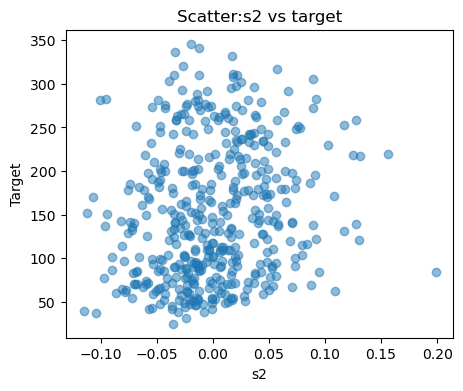

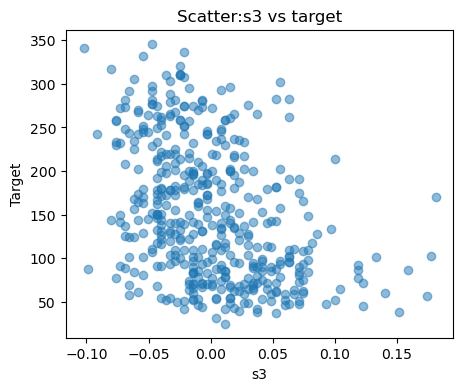

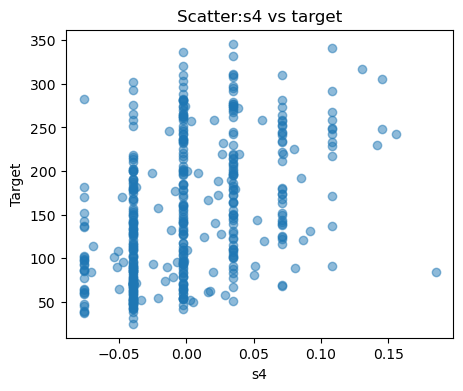

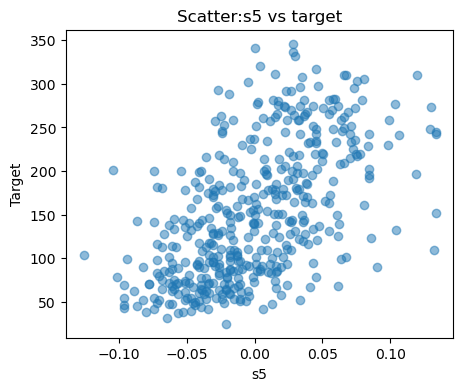

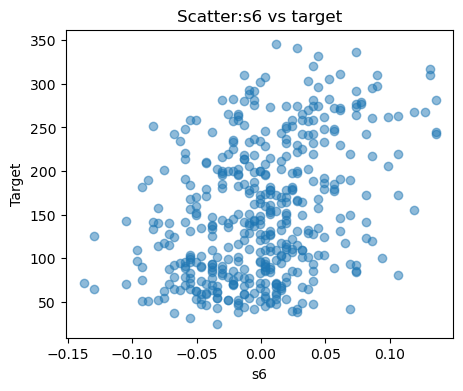

In [9]:
## Step 3: Relationships (Scatter plot and Correlation) 

# Scatter Plot for each of the different features 
for col in df.columns[:-1]:
    plt.figure(figsize=(5,4))
    plt.scatter(df[col], df['target'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Target")
    plt.title(f"Scatter:{col} vs target")
    plt.show()

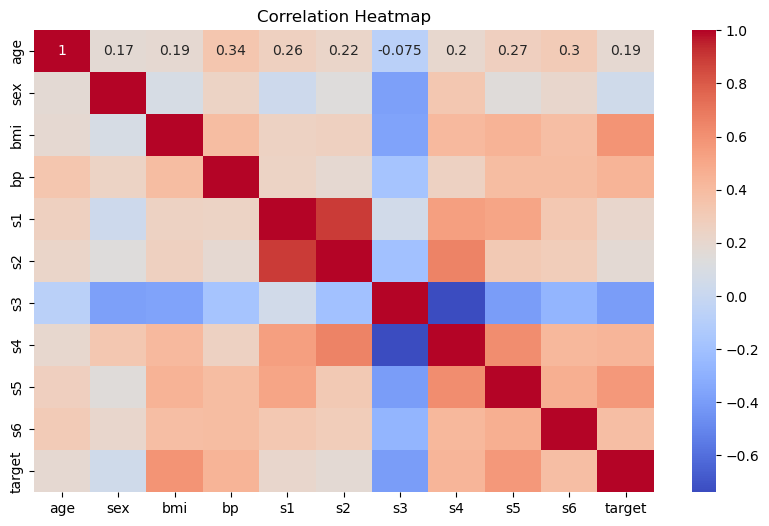

In [10]:
## Correlation heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Train MSE: 3854.11265207582
Test MSE: 4061.8259284949263
Train R2: 0.3657241273794126
Test R2: 0.2333503981587215


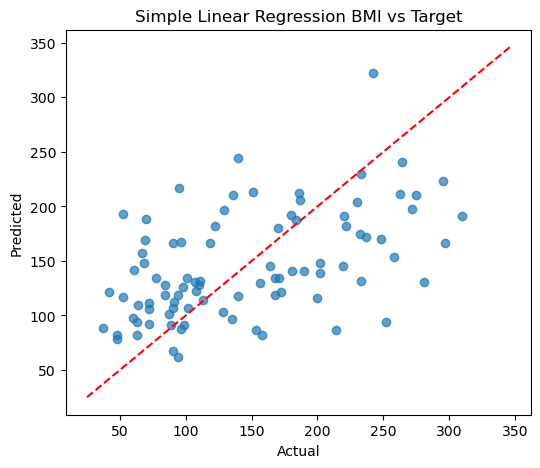

In [11]:
## Step 4: Simple Linear Regression (One Feature): BMI as the predictor variable to predict the target.
# - train / test split 
# - fit regression model 
# - evaluate using MSE and R-squared 

# Single feature regression (BMI -> Target) 
x = df[['bmi']]
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)  # Fixed typo: model_fir -> model.fit

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test) 

print("Train MSE:", mean_squared_error(y_train, y_train_pred))  # Fixed: removed extra y_train parameter
print("Test MSE:", mean_squared_error(y_test, y_test_pred)) 
print("Train R2:", r2_score(y_train, y_train_pred)) 
print("Test R2:", r2_score(y_test, y_test_pred)) 

# Plot 
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel("Actual") 
plt.ylabel("Predicted")  # Fixed typo: Predicated -> Predicted
plt.title("Simple Linear Regression BMI vs Target")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [24]:
 ## Step 5: Simple Linear Regression (Two Feature) predictors as BMI & Age vs Target 

x2 = df[['bmi', 'age']]
y2 = df['target']
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(x2_train, y_train)

y2_train_pred = model2.predict(x2_train)
y2_train_pred = model2.predict(x2_test)

print("Train MSE (2 features): ", mean_squared_error(y_train, y2_train_pred))
print("Test MSE (2 features): ", mean_squared_error(y_test, y2_test_pred))
print("Train R2 (2 features): ", r2_score(y_train, y2_train_pred))
print("Train R2 (2 features): ", r2_score(y_test, y2_test_pred))

# Plot 
plt.figure(figsize=(6,5))
plt.scatter(y_test, y2_test_pred, alpha=0.7, color="orange")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Multiple Regression: BMI & Age vs Target")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [353, 89]